In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('load.csv')
except:
    # Nếu chưa có, tạo dữ liệu mẫu để demo
    print("Không tìm thấy file, tạo dữ liệu mẫu...")
    df = pd.DataFrame(np.random.rand(1000, 6), columns=['temperature', 'relative_humidity', 'surface_pressure', 'wind_speed', 'precipitation', 'cloud_cover'])

# Chọn các đặc trưng để gom nhóm
features = ['temperature', 'relative_humidity', 'surface_pressure', 'wind_speed', 'precipitation']
X = df[features].values

# Chuẩn hóa dữ liệu (Rất quan trọng với Clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [2]:
# ==========================================
# BƯỚC 2: CLUSTERING (GOM NHÓM)
# ==========================================
# Chúng ta muốn chia thành 4 loại thời tiết (ví dụ: Nắng, Mưa, Mây, Tuyết)
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Lấy nhãn cụm (0, 1, 2, 3) gán vào dataframe
df['Cluster_Label'] = kmeans.labels_

# --- Phân tích ý nghĩa của từng cụm (Để con người hiểu) ---
print("Đặc điểm trung bình của từng nhóm thời tiết:")
print(df.groupby('Cluster_Label')[features].mean())
# Ví dụ quy tắc đặt tên (Bạn cần nhìn bảng trên để đặt tên cho đúng thực tế):
# Nhóm có precipitation cao -> Rainy
# Nhóm có temperature cao, humidity thấp -> Sunny
# ...

Đặc điểm trung bình của từng nhóm thời tiết:
               temperature  relative_humidity  surface_pressure  wind_speed  \
Cluster_Label                                                                 
0                22.297335          51.274710       1012.019156   10.984793   
1                 9.813113          79.152646       1012.747199    7.714606   
2                14.894603          90.737864       1002.040549   15.390058   
3                 8.437814          62.076577       1003.322917   18.586512   

               precipitation  
Cluster_Label                 
0                   0.022479  
1                   0.083425  
2                   5.076395  
3                   0.100898  


In [3]:
# ==========================================
# BƯỚC 3: CLASSIFICATION (PHÂN LOẠI)
# ==========================================
print("\nBắt đầu huấn luyện mô hình phân loại dựa trên Cluster...")

# Input: Các chỉ số thời tiết
X_cls = X_scaled 
# Output: Nhãn cụm mà K-Means vừa sinh ra (đóng vai trò là Weather Type)
y_cls = df['Cluster_Label'] 

# Chia tập Train/Test
X_train, X_test, y_train, y_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

# Huấn luyện mô hình phân loại
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Đánh giá
y_pred = clf.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print(f"Độ chính xác của mô hình phân loại: {acc * 100:.2f}%")


Bắt đầu huấn luyện mô hình phân loại dựa trên Cluster...
Độ chính xác của mô hình phân loại: 98.02%


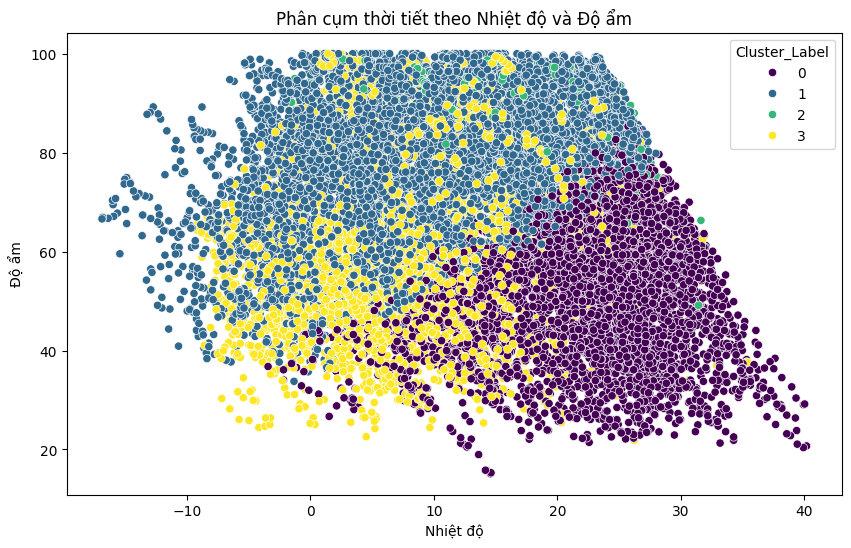

In [4]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='temperature', y='relative_humidity', hue='Cluster_Label', palette='viridis')
plt.title('Phân cụm thời tiết theo Nhiệt độ và Độ ẩm')
plt.xlabel('Nhiệt độ')
plt.ylabel('Độ ẩm')
plt.show()